In [1]:
#importing Required library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#importing plotly Library
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()


In [3]:
#importing the datase

df=pd.read_csv(r"zomato.csv")
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape


(51717, 17)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
del df["url"]
del df["address"]
del df["phone"]


In [7]:
# Duplicates values
df.duplicated().sum()


63

In [8]:
df.drop_duplicates(inplace=True)


In [9]:
#checking the NaN values
df.isnull().sum()


name                               0
online_order                       0
book_table                         0
rate                            7760
votes                              0
location                          21
rest_type                        227
dish_liked                     28027
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

<AxesSubplot:>

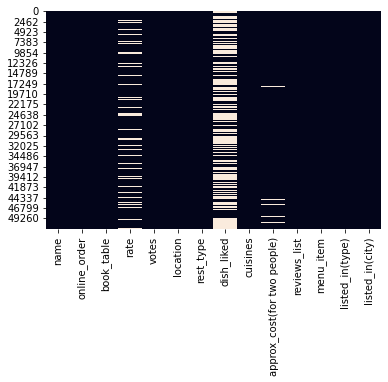

In [10]:
sns.heatmap(df.isnull(), cbar=False)


In [11]:
del df["dish_liked"]


In [12]:
df.dropna(how='any',inplace=True)


In [13]:
#checking the NaN values
df.isnull().sum()


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

<AxesSubplot:>

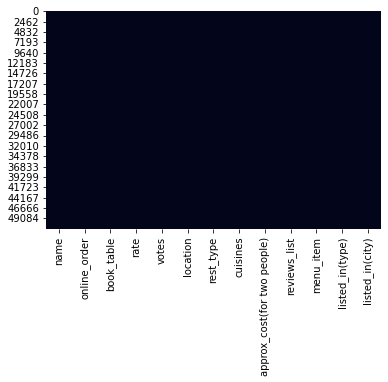

In [14]:
sns.heatmap(df.isnull(), cbar=False)




In [15]:
#Reading Column Names
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [16]:
#Changing the column names
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'menu_item', 'type',
       'city'],
      dtype='object')

In [17]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [18]:
df.cost.unique()


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [19]:
#Some Transformations
df['cost'] = df['cost'].astype(str) #Changing the cost to string
df['cost'] = df['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
df['cost'] = df['cost'].astype(float) # Changing the cost to Float
df.info() # looking at the dataset information after transformation


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43486 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43486 non-null  object 
 1   online_order  43486 non-null  object 
 2   book_table    43486 non-null  object 
 3   rate          43486 non-null  object 
 4   votes         43486 non-null  int64  
 5   location      43486 non-null  object 
 6   rest_type     43486 non-null  object 
 7   cuisines      43486 non-null  object 
 8   cost          43486 non-null  float64
 9   reviews_list  43486 non-null  object 
 10  menu_item     43486 non-null  object 
 11  type          43486 non-null  object 
 12  city          43486 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 4.6+ MB


In [20]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [21]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [22]:
#Removing '/5' from Rates
df = df.loc[df.rate !='NEW'] #Removed rows which were having "new"
df = df.loc[df.rate !='-'].reset_index(drop=True) #Removed rows which were having "-"
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x #Function 
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')#apply function to col
df['rate'].head() # looking at the dataset after transformation


C:\Users\Admin\AppData\Local\Temp/ipykernel_4752/2712580565.py:4: DeprecationWarning:

`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41226 entries, 0 to 41225
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41226 non-null  object 
 1   online_order  41226 non-null  object 
 2   book_table    41226 non-null  object 
 3   rate          41226 non-null  float64
 4   votes         41226 non-null  int64  
 5   location      41226 non-null  object 
 6   rest_type     41226 non-null  object 
 7   cuisines      41226 non-null  object 
 8   cost          41226 non-null  float64
 9   reviews_list  41226 non-null  object 
 10  menu_item     41226 non-null  object 
 11  type          41226 non-null  object 
 12  city          41226 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 4.1+ MB


<AxesSubplot:ylabel='online_order'>

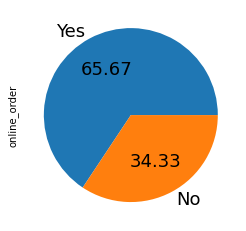

In [24]:
df.online_order.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')


<AxesSubplot:ylabel='book_table'>

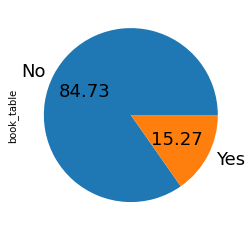

In [25]:

df.book_table.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')


IndexError: list index out of range

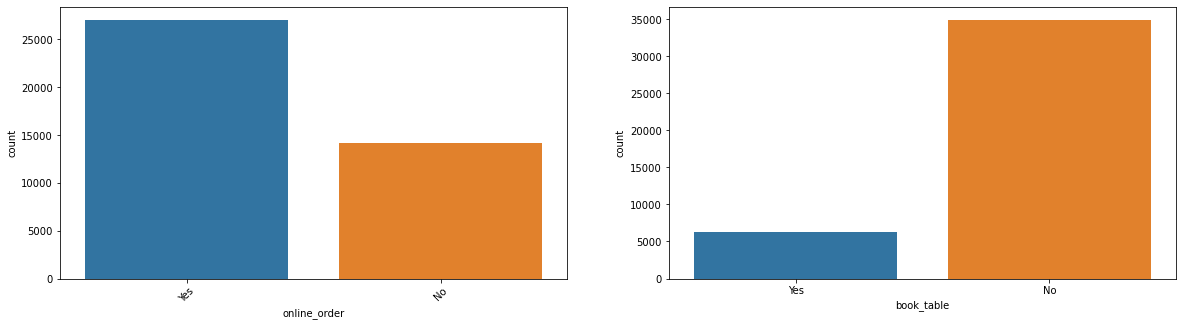

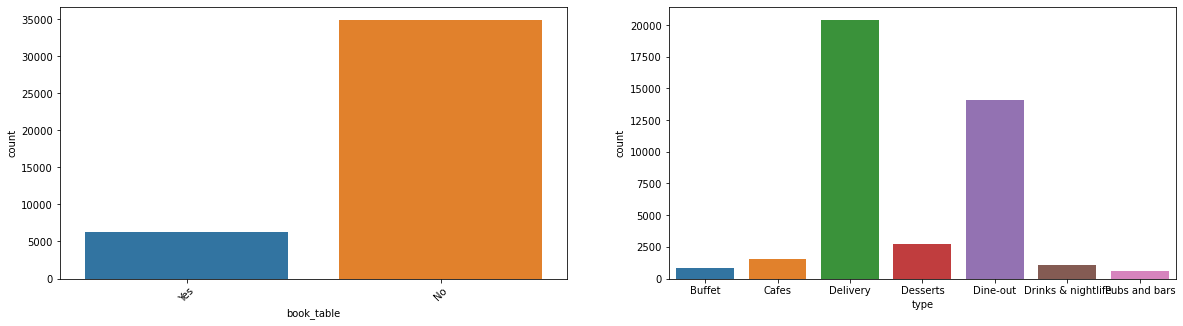

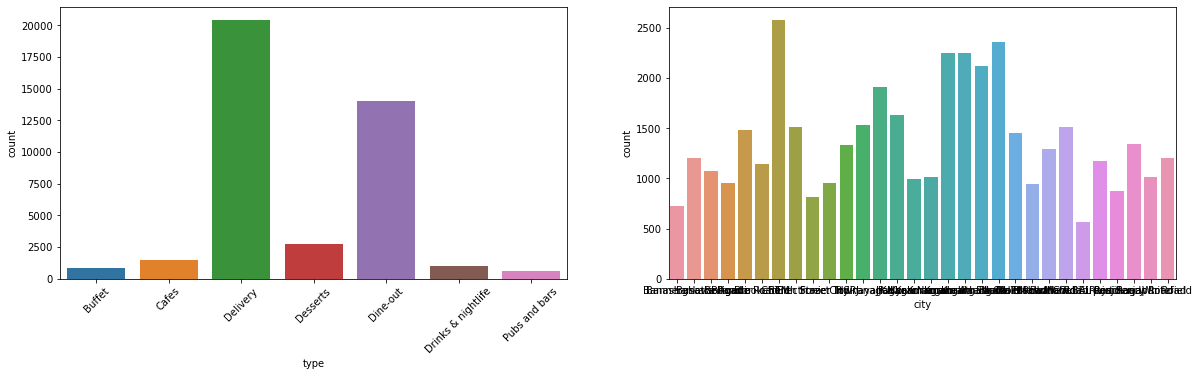

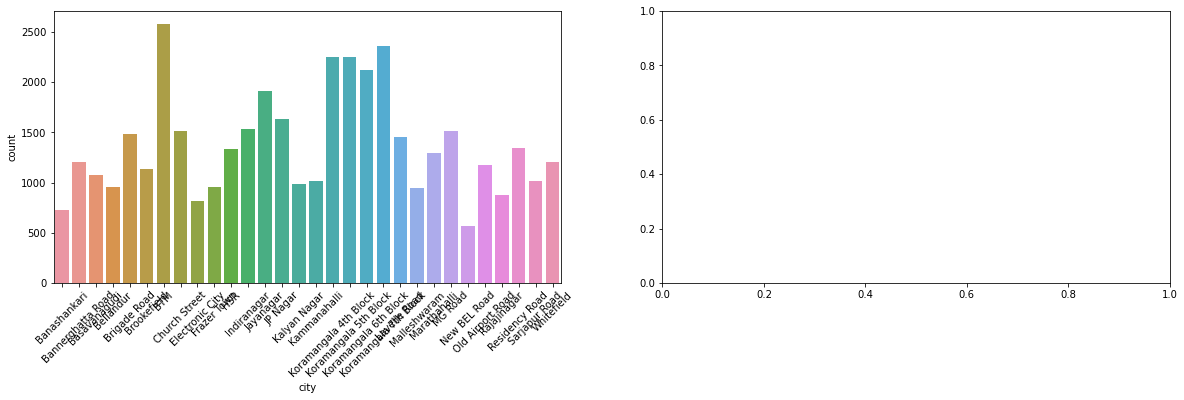

In [26]:
cat_cols = ['online_order','book_table','type','city']
i=0
while i < 4:
    fig = plt.figure(figsize=[20,5])
    
    
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=45)
    i += 1
    
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)


In [ ]:
df.name.value_counts().head(30).iplot(kind="bar")


In [ ]:
df.rest_type.value_counts().head(30).iplot(kind="bar")


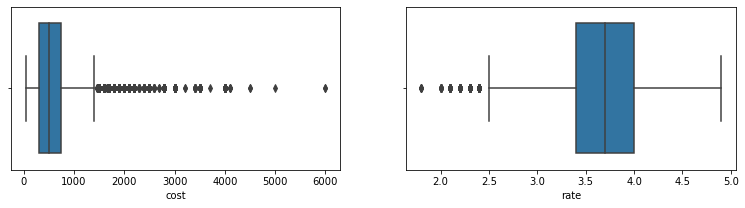

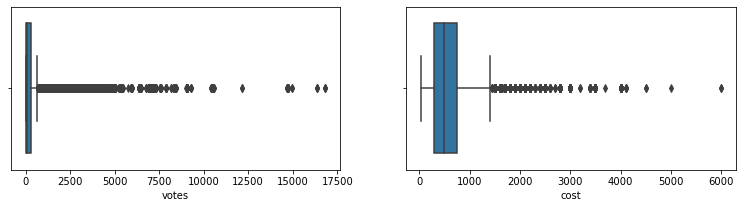

In [29]:
num_cols = ['cost','rate','votes','cost']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()


In [ ]:
df.describe()

In [ ]:
df[df.cost>3000].sort_values(ascending=False,by="cost")


In [ ]:
df[df.cost>3000].sort_values(ascending=False,by="cost").location.value_counts().iplot(kind="bar")


In [ ]:
df[df.cost>3000].rest_type.value_counts().iplot(kind="bar")


In [ ]:
rate_type=pd.crosstab(df['rate'],df['type'])
rate_type


In [27]:
rate_type.iplot(kind="bar",barmode="stack")


NameError: name 'rate_type' is not defined

In [ ]:
df["location"].value_counts().head(20).iplot(kind="bar")



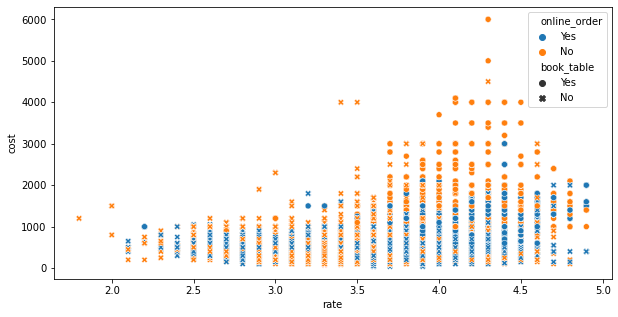

In [28]:

plt.figure(figsize=(10,5))
sns.scatterplot(x="rate",y='cost',hue='online_order',data=df,style="book_table")
plt.show()


In [ ]:
df[(df["cost"]<=100) & (df["rate"]>=4)].sort_values(by=["rate"],ascending=False)


In [ ]:
df[(df["cost"]<=100) & (df["rate"]>=4)].sort_values(by=["rate"],ascending=False).location.value_counts().iplot(kind="bar")


In [ ]:
df["cost"].mean()


In [ ]:
df[(df["cost"]<=df["cost"].mean()) & (df["rate"]>=4) ].sort_values(by=["rate"],ascending=False)


In [ ]:
df.cuisines.value_counts().sort_values(ascending = False).head(10).iplot(kind="bar")


In [ ]:
resbyloc=df.groupby("location")


In [ ]:
resbyloc.mean()


In [ ]:
resbyloc.mean().sort_values(by="cost").iplot(kind="bar",barmode="stack")


In [ ]:
print(" Cost for 2 :")
res_cost=float(input(""))
print("Location : ")
res_loc=input("")
def top_rest(res_cost,res_loc):
    x=df[(df["cost"]<=res_cost) & (df["rate"]>=4) & (df["location"]==res_loc) ].sort_values(by=["rate"],ascending=False)
    return x
top_rest(res_cost,res_loc)
